In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-placements-prediction/collegePlace.csv


In [2]:
df = pd.read_csv("/kaggle/input/engineering-placements-prediction/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
df2 = pd.DataFrame(df)
df3 = df2[["Stream","Internships","CGPA","HistoryOfBacklogs","PlacedOrNot"]]

In [5]:
df3.head()

,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,Electronics And Communication,1,8,1,1
1,Computer Science,0,7,1,1
2,Information Technology,1,6,0,1
3,Information Technology,0,8,1,1
4,Mechanical,0,8,0,1


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Stream             2966 non-null   object
 1   Internships        2966 non-null   int64 
 2   CGPA               2966 non-null   int64 
 3   HistoryOfBacklogs  2966 non-null   int64 
 4   PlacedOrNot        2966 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 116.0+ KB


In [7]:
import matplotlib.pyplot as plt

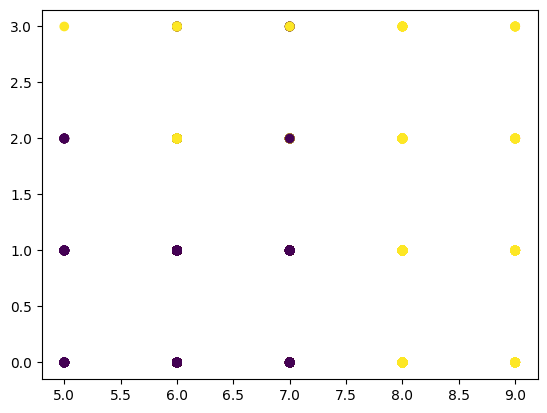

In [16]:
plt.scatter(df3['CGPA'],df3['Internships'],c=df3['PlacedOrNot'])

In [18]:
x = df3[["CGPA","Internships"]]
y = df3['PlacedOrNot']

In [20]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [37]:
x_test

,CGPA,Internships
981,7,0
1789,8,0
2251,6,0
2085,7,1
696,8,0
...,...,...
2679,7,2
2860,7,1
1168,9,0
124,7,2


In [38]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [39]:
x_train = scaler.fit_transform(x_train)

In [40]:
x_test = scaler.fit_transform(x_test)

In [41]:
#training the model
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [44]:
clf.fit(x_train,y_train)

LogisticRegression()

In [47]:
#evaluate the model
y_pred = clf.predict(x_test)

In [46]:
y_test

981     0
1789    1
2251    0
2085    0
696     1
       ..
2679    1
2860    0
1168    1
124     1
1923    1
Name: PlacedOrNot, Length: 297, dtype: int64

In [48]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7407407407407407

In [49]:
#deploying the model
import pickle

In [50]:
pickle.dump(clf,open('myfirstdeployablemodel.pkl','wb'))#wb is binary

In [ ]:
#deploy this model to a website, provide the input data and you ll get the prediction